In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Read in data
df = pd.read_csv("us-counties.csv")

In [3]:
#Check data
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
#Earliest date in data
min_date = df["date"].min()
min_date

'2020-01-21'

In [5]:
#Latest date in data
max_date = df["date"].max()
max_date

'2020-04-19'

## Cumulative Total Cases by Day

In [6]:
#Create a dataframe that has the total number of cases in the country by day
total_by_date = df.groupby(["date"], as_index=False)["cases"].sum()

In [7]:
total_by_date.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


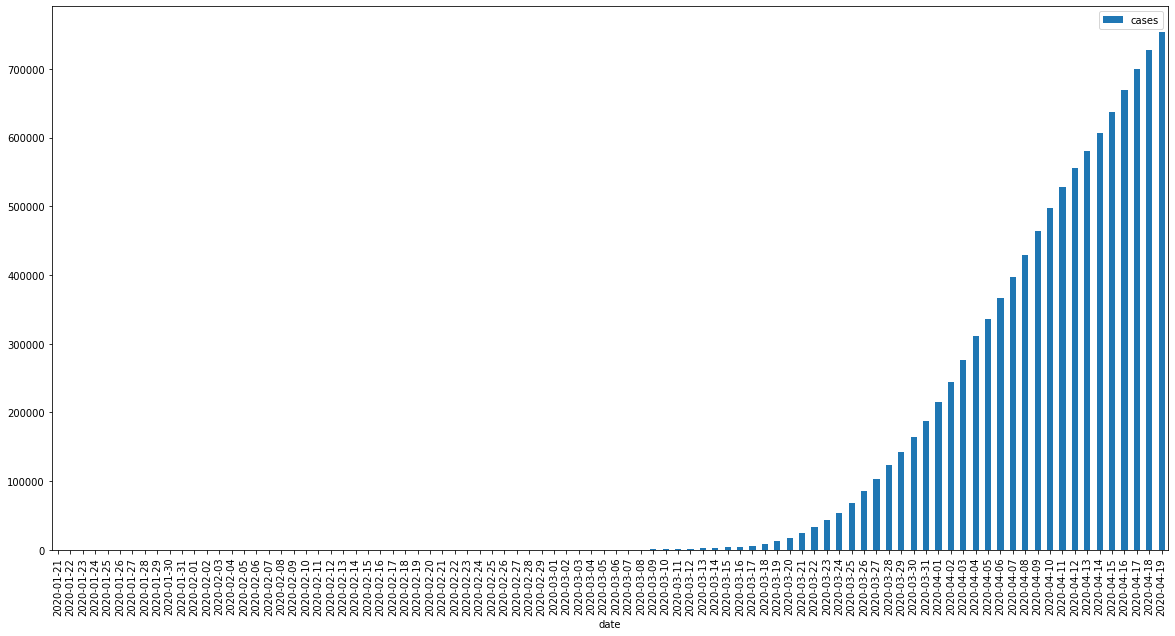

In [34]:
total_by_date.plot(kind='bar', figsize = (20,10), x='date',y='cases')

## Cumulative Total Deaths by Day

In [9]:
deaths_by_date = df.groupby("date")["deaths"].sum()

In [10]:
deaths_by_date.head()

date
2020-01-21    0
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
Name: deaths, dtype: int64

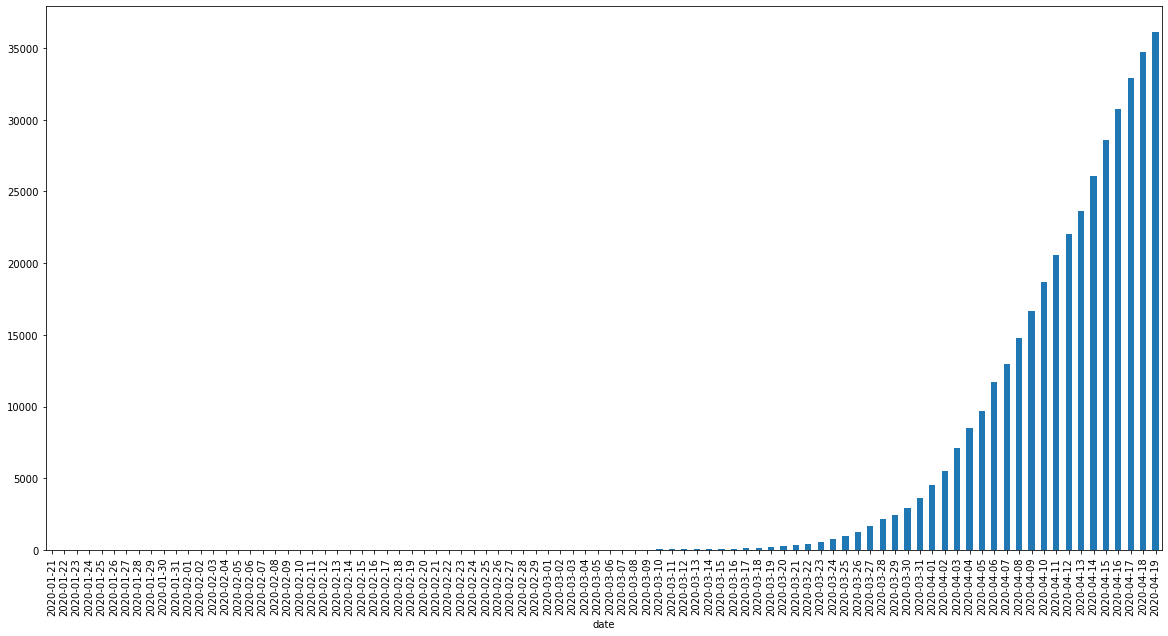

In [37]:
deaths_by_date.plot(kind='bar', figsize = (20,10), x='date',y='cases')

## Total number of New Cases per Day

In [13]:
total_by_date['new_cases'] = total_by_date['cases'] - total_by_date['cases'].shift(1)

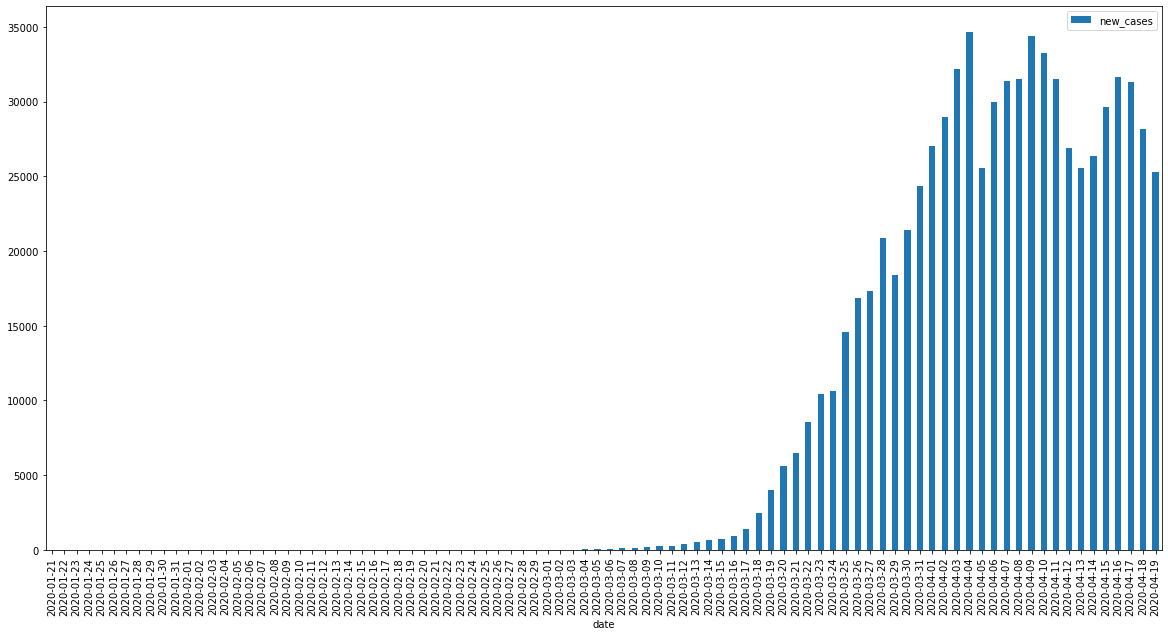

In [38]:
total_by_date.plot(kind='bar', figsize = (20,10), x='date',y='new_cases')

## Number of New Cases per Day by State

In [54]:
#Number of new cases per day by state

#Isolate the state -- INPUT STATE NAME HERE
state_df = df[df['state'] == 'Colorado']
state_df.head()

,date,county,state,fips,cases,deaths
548,2020-03-05,Douglas,Colorado,8035.0,1,0
549,2020-03-05,Jefferson,Colorado,8059.0,1,0
599,2020-03-06,Denver,Colorado,8031.0,2,0
600,2020-03-06,Douglas,Colorado,8035.0,3,0
601,2020-03-06,Eagle,Colorado,8037.0,1,0


In [55]:
#Dataframe for total by day by state
date_and_state = state_df.groupby(["date"], as_index=False)["cases"].sum()
date_and_state.head()

,date,cases
0,2020-03-05,2
1,2020-03-06,8
2,2020-03-07,8
3,2020-03-08,8
4,2020-03-09,12


In [56]:
#Add a column to the dataframe that is the number of new cases per day
date_and_state['new_cases'] = date_and_state['cases'] - date_and_state['cases'].shift(1)
date_and_state.head()

,date,cases,new_cases
0,2020-03-05,2,NaN
1,2020-03-06,8,6.0
2,2020-03-07,8,0.0
3,2020-03-08,8,0.0
4,2020-03-09,12,4.0


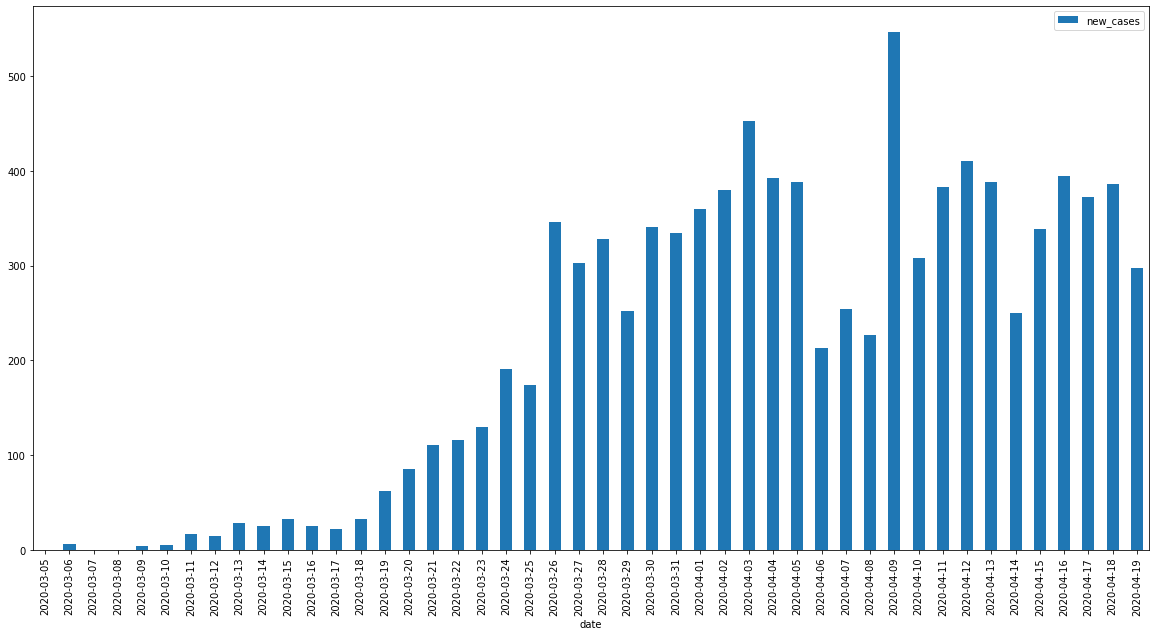

In [57]:
#date_and_state.head()
date_and_state.plot(kind='bar', figsize = (20,10), x='date',y='new_cases')

## Look at Population Data

In [21]:
#Import population data
pop_df = pd.read_csv("State_Populations.csv")

In [22]:
pop_df.head()

,state,population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [23]:
#Isolate the data for the most recent date
latest_date = df[df['date'] == max_date]

In [24]:
latest_date.head()

,date,county,state,fips,cases,deaths
70218,2020-04-19,Autauga,Alabama,1001.0,27,2
70219,2020-04-19,Baldwin,Alabama,1003.0,114,3
70220,2020-04-19,Barbour,Alabama,1005.0,20,0
70221,2020-04-19,Bibb,Alabama,1007.0,28,0
70222,2020-04-19,Blount,Alabama,1009.0,21,0


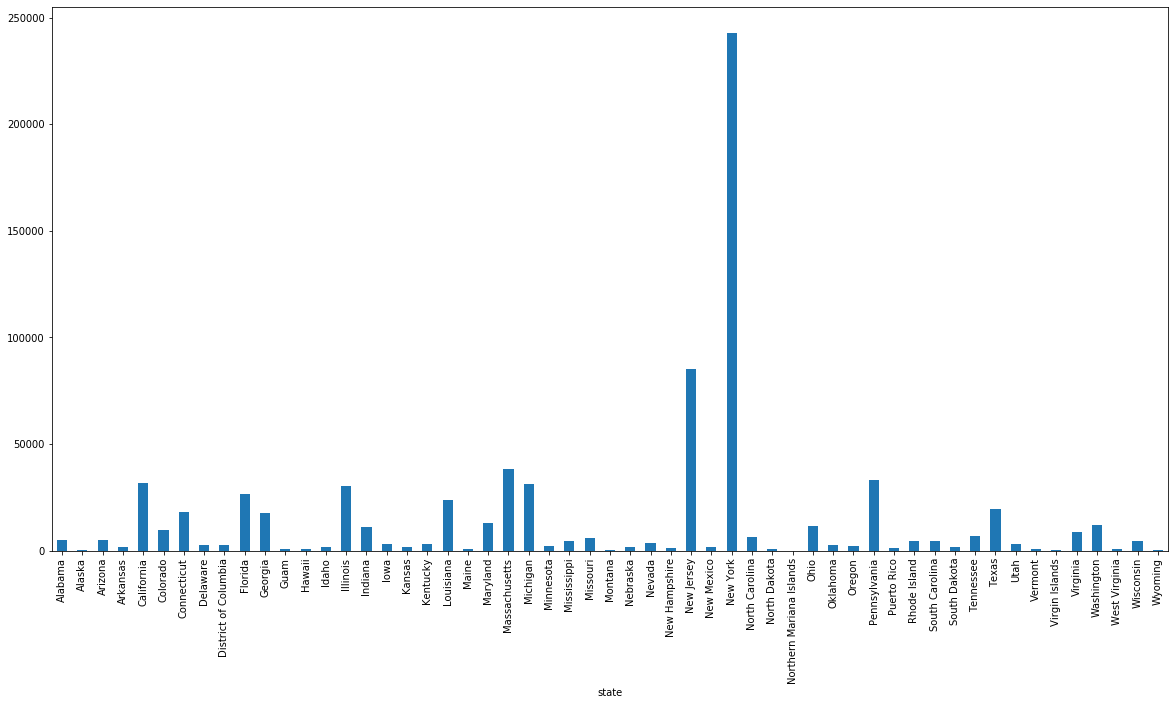

In [39]:
#Get total number of cases by state on most recent date
latest_date_sum = latest_date.groupby("state")["cases"].sum()
latest_date_sum.head()
latest_date_sum.plot(kind='bar',figsize = (20,10), x='date',y='new_cases')

In [27]:
#Merge cases per state dataframe with population data
combined_df = pd.merge(latest_date_sum, pop_df, on='state')
combined_df.head()

,state,cases,population
0,Alabama,4903,4888949
1,Alaska,317,738068
2,Arizona,4929,7123898
3,Arkansas,1781,3020327
4,California,31544,39776830


In [49]:
#Create column that is cases as a percent of population
combined_df['percent_of_pop'] = (combined_df['cases'] / combined_df['population']) * 100

#Sort data
#combined_df.sort_values(by=['percent_of_pop'], ascending = False)
sorted_df = combined_df.sort_values(by=['percent_of_pop'], ascending = False)
#sorted_df

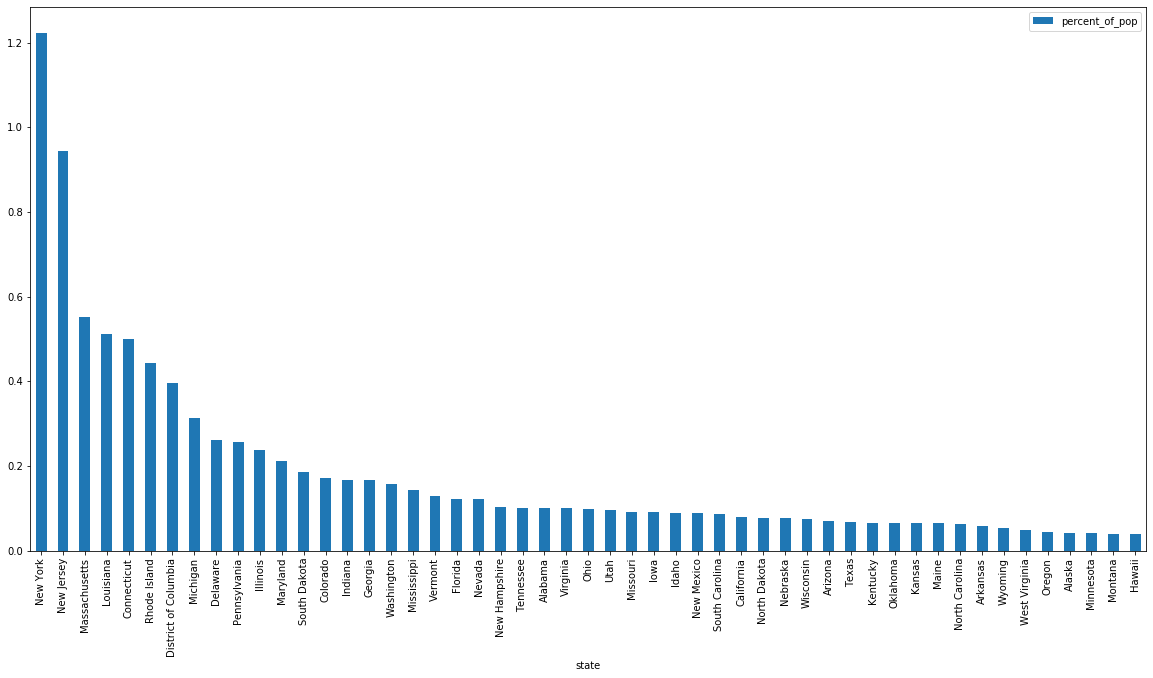

In [47]:
sorted_df.plot(kind='bar',figsize = (20,10), x='state',y='percent_of_pop')